# About me:



## Profile
**Name** : BVSG Suraj

**Batch** : 7

**Project** : Implement [Facial Expression Recognition](https://github.com/zlpure/Facial-Expression-Recognition) using winograd convolutions and write a tutorial on the same.

## Current Status

Implementing seperable convolutions.

## Logs
* 19/6 : The validation accuracy did not improve much over epochs while using 'class_weights'. 
* 18/6 : Ditching Winograd Implementation. Going with Seperable Conv. (DONE)
* 16/6 : Implementing winograd convolutions for 2D data (ABORTTED)
* 14/6 : Performing EDA and some data pre-processing. (DONE)
* 13/6 : Setting up Jupyter Notebook. (DONE)
* 12/6 : Understanding Winograg Convolution. (DONE)
* 10/6 : Starting literature survey. (DONE)

# Preliminary Setup


In [0]:
#Installing required libraries
!pip install -q keras
#!pip install -q --upgrade git+git://github.com/fchollet/keras.git
!pip install -q pathlib

In [3]:
#Linking drive to colab to store datasets
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18298 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Preparing to unpack .../04-gnupg_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking gnupg (2.1.15-1ubuntu8.1) over (2.1.15-1ubuntu8) ...
Preparing to unpack .../05-gnupg-agent_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking gnupg-agent (2.1.15-1ubuntu8

Setting up libkmod2:amd64 (24-1ubuntu2) ...
Setting up gir1.2-glib-2.0:amd64 (1.54.1-1) ...
Processing triggers for libc-bin (2.26-0ubuntu2.1) ...
Setting up libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Setting up unattended-upgrades (0.98ubuntu1.1) ...

Creating config file /etc/apt/apt.conf.d/20auto-upgrades with new version

Creating config file /etc/apt/apt.conf.d/50unattended-upgrades with new version
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up gnupg-agent (2.1.15-1ubuntu8.1) ...
Setting up dirmngr (2.1.15-1ubuntu8.1) ...
Setting up cron (3.0pl1-128ubuntu5) ...
Adding group `crontab' (GID 102) ...
Done.
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
update-rc.d: warning: stop runlevel arguments (1) do not match cron Default-Stop values (none)
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up libdbus-1-3:a

In [4]:
# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()

# Generate creds for the Drive FUSE library. Though the link asks you to verify twice, you don't have to!
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [5]:
# Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive

print ('Files in Drive:')
!ls drive/EIP/Facial_Expression_Recognition/

Files in Drive:
BVSG_Suraj_Session7.ipynb	  weights-improvement-34-0.31.hdf5
datalab				  weights-improvement-36-0.33.hdf5
drive				  weights-improvement-39-0.35.hdf5
fer2013				  weights-improvement-43-0.36.hdf5
fer2013.tar.gz			  weights-improvement-44-0.37.hdf5
fer2013.tar.gz.1		  weights-improvement-45-0.39.hdf5
weights-improvement-28-0.28.hdf5  weights-improvement-54-0.39.hdf5
weights-improvement-31-0.28.hdf5  weights-improvement-59-0.40.hdf5


In [0]:
#Unpack datasets and copy back to drive. Just once at the beginning.
#!tar -xvf drive/EIP/Facial_Expression_Recognition/fer2013.tar.gz
#!cp -a . drive/EIP/Facial_Expression_Recognition

# Run this only when starting a new session. Syncing files in drive to pwd.
!cp -a drive/EIP/Facial_Expression_Recognition/*.hdf5 .
#!ls

# Environment specific Setup

In [7]:
#Framework related libraries
import keras
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, Activation
from keras.layers import MaxPooling2D, BatchNormalization, SeparableConv2D
from keras.layers import Concatenate
from keras.optimizers import Adam

##---------------------------------------------##

#For loading models
from pathlib import Path
from keras.models import load_model

##---------------------------------------------##

##Data preprocessing

#for class balance
from sklearn.utils import class_weight

#For data augmentation
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

##---------------------------------------------##

# this part will prevent tensorflow to allocate all the avaliable GPU Memory
# backend
import tensorflow as tf
#tf.python.control_flow_ops = tf
from keras import backend as k

##---------------------------------------------##

# Don't pre-allocate memory; allocate as-needed
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

##---------------------------------------------##

# Create a session with the above options specified.
k.tensorflow_backend.set_session(tf.Session(config=config))

Using TensorFlow backend.


In [0]:
#Data handling libraries
import numpy as np
import pandas as spd

##---------------------------------------------##

#Image handling libraries
import matplotlib.pyplot as plt

##---------------------------------------------##

# This is a bit of magic to make matplotlib figures appear inline in the notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
%load_ext autoreload
%autoreload 2

# Exploratory Data Analysis



In [0]:
#Given data set is in csv format after unzipping.

file = 'drive/EIP/Facial_Expression_Recognition/fer2013/fer2013.csv'
df = spd.read_csv(file)

In [0]:
#Assign separate data frames to training, cross-validation and test data

#Training set
tr_set = df.loc[df['Usage'] == 'Training']
tr = tr_set.loc[:,'pixels']
tr_labels = tr_set.loc[:,'emotion']

#Cross-validation set
cv_set = df.loc[df['Usage'] == 'PublicTest']
cv = cv_set.loc[:,'pixels']
cv_labels = cv_set.loc[:,'emotion']

#Test set
te_set = df.loc[df['Usage'] == 'PrivateTest']
te = te_set.loc[:,'pixels']
te_labels = te_set.loc[:,'emotion']

Lets randomly sample 5 images of each emotion from training dtaset

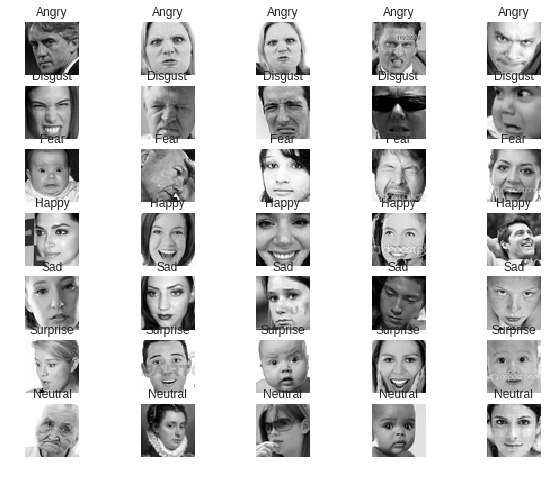

In [11]:
tr_set_emotions_label = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']

#size of each class will be stored in this array
t=np.zeros(np.size(tr_set_emotions_label)) 

#No. of images to sample from each class
sample_size=5

#Display those images
for k,e in enumerate(tr_set_emotions_label):
  this_emotion_set = df.loc[(df['Usage'] == 'Training') & (df['emotion'] == k)]
  t[k] = this_emotion_set.size
  x=this_emotion_set.sample(n=sample_size).loc[:,'pixels']
  for i,j in enumerate(x):
    plt.subplot(t.size, sample_size,(sample_size*k)+i+1)
    y = j.split(' ')
    x = np.array(y).reshape(48,48)
    plt.axis('off')
    plt.grid('off')
    plt.imshow(x.astype('uint8'))
    plt.title(e)

## Inferences


1.   The data provided is flattened/unrolled. To display them, we have to roll or reshape the vectors.
2.   This dataset consists of faces of various expressions of all kinds of age, race and sex. That means the data is well generalized. 
3.   Faces in the images seemed to be centered. So, face detection and extraction can be skipped.
4.   Images are in grey scale. That means fewer parameters.
5.  Given the classes 'Surprise' and 'Happy', there might be high chance of misclassification. This is due to their high spatial corelation.

Let's explore data distribution among various classes

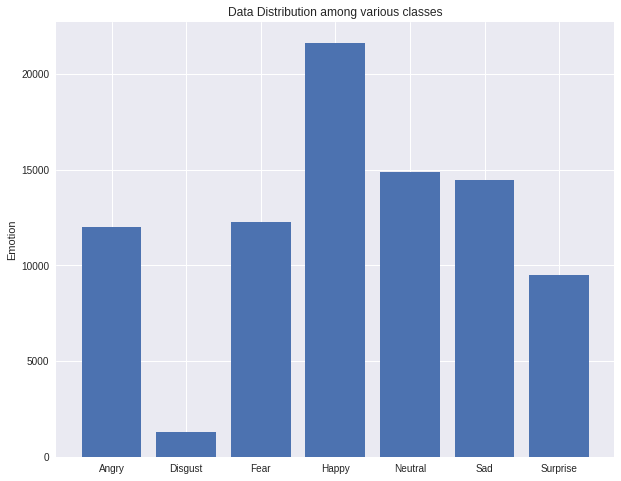

In [11]:
#Plotting no. of training examples vs their class
plt.bar(tr_set_emotions_label, t)
plt.ylabel('No. of training examples')
plt.ylabel('Emotion')
plt.title('Data Distribution among various classes')

plt.show()  

* It can be observed that the class 'Disgust' has very less number of training data. 

* And there is a high possibility of the model to predict 'Happy' if the training data isn't normalized.

* This problem can be solved in various ways:

  1.** Assigning weightage** for each class using Keras 'class_weight'. This is preferred.
  
  2.** Data augmentation** - Since the variation among the no. of training examples accross the classes is very high, using augmentation might not be a good idea. If we do that, there will be a rich variation in 'Happy' class and less variations in 'disgust' class and training over this data would be redundant. But applying Augmentation on all of the classes is a good idea.
  
  3.** Removing data** from other classes. Loss of data is not encouraged usually. 

  4.** Using GANs** : New training data can be created from the respective class's distribution. This is an option too.


**NOTE : The labels on the x-axis are not in order of the labels 0-7**

# Data Preprocessing


## Rolling the data

In [12]:
#train data
tr_img = []
tr_l = np.zeros((np.size(tr),np.size(t)))
#print(tr_labels)
for p,i in enumerate(tr):
    y = i.split(' ')
    y = np.array(y).reshape(48,48,1)
    tr_img.append(y)
    tr_l[p,tr_labels[p]]=1
tr_img = np.array(tr_img)
print(tr_img.shape)

(28709, 48, 48, 1)


In [13]:
#cv data
cv_img = []
cv_l = np.zeros((np.size(cv),np.size(t)))
for p,i in enumerate(cv):
    y = i.split(' ')
    y = np.array(y).reshape(48,48,1)
    cv_img.append(y)
    cv_l[p,cv_labels[np.size(tr)+p]] = 1
print(cv_l)
cv_img = np.array(cv_img)
print(cv_img.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
(3589, 48, 48, 1)


In [14]:
#test data
te_img = []
te_l = np.zeros((np.size(te),np.size(t)))
for p,i in enumerate(te):
    y = i.split(' ')
    y = np.array(y).reshape(48,48,1)
    te_img.append(y)
    te_l[p,te_labels[np.size(tr) + np.size(cv) + p]]=1
print(te_l)
te_img = np.array(te_img)
print(te_img.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
(3589, 48, 48, 1)


## Assigning weights to classes

In [0]:
#Finding the weightage to be given to each class
class_weights_array = np.round(np.max(t)/t)

class_weight = dict(zip(np.arange(np.size(t)), class_weights_array))

#print(class_weight)

# Acrhitecture

## Model

In [16]:
model = Sequential()

f = 64
model.add(SeparableConv2D(f,(3,1),activation='relu', input_shape=(48,48,1)))
model.add(SeparableConv2D(f,(1,3),activation='relu'))

model.add(BatchNormalization())

model.add(SeparableConv2D(f,(3,1),activation='relu'))
model.add(SeparableConv2D(f,(1,3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

##

f=128
model.add(SeparableConv2D(f,(3,1),activation='relu'))
model.add(SeparableConv2D(f,(1,3),activation='relu'))

model.add(BatchNormalization())

model.add(SeparableConv2D(f,(3,1),activation='relu'))
model.add(SeparableConv2D(f,(1,3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Dropout(0.2))

##

f=256
model.add(SeparableConv2D(f,(3,1),activation='relu'))
model.add(SeparableConv2D(f,(1,3),activation='relu'))

model.add(BatchNormalization())

model.add(SeparableConv2D(f,(3,1),activation='relu'))
model.add(SeparableConv2D(f,(1,3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Dropout(0.25))

##
f=512
model.add(SeparableConv2D(f,(3,1),activation='relu'))
model.add(SeparableConv2D(f,(1,3),activation='relu'))

model.add(BatchNormalization())

model.add(SeparableConv2D(f,(3,1),activation='relu'))
model.add(SeparableConv2D(f,(1,3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Dropout(0.25))

##

model.add(Flatten())
model.add(Dense(7, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 46, 48, 64)        131       
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 46, 46, 64)        4352      
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 44, 46, 64)        4352      
_________________________________________________________________
separable_conv2d_4 (Separabl (None, 44, 44, 64)        4352      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
separable_conv2d_5 (Separabl (None, 41, 43, 128)       8512      
__________

## Compile and run

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# checkpoint
from keras.callbacks import ModelCheckpoint
filepath= "weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
callbacks_list = [checkpoint]

## Epoch 1-10

In [18]:
epoch = 0
model.fit(tr_img, tr_l, 
          batch_size=32, 
          nb_epoch=10, 
          verbose=1,
          initial_epoch=epoch,
          callbacks=callbacks_list,
          validation_data=(cv_img, cv_l),class_weight = class_weight)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 28709 samples, validate on 3589 samples
Epoch 1/10
22080/28709 [======================>.......] - ETA: 37s - loss: 3.1789 - acc: 0.1409

28709/28709 [==============================] - 169s 6ms/step - loss: 3.1562 - acc: 0.1395 - val_loss: 1.9842 - val_acc: 0.1382

Epoch 00001: val_acc improved from -inf to 0.13820, saving model to weights-improvement-01-0.14.hdf5
Epoch 2/10
 8096/28709 [=======>......................] - ETA: 1:54 - loss: 3.2060 - acc: 0.1393

28709/28709 [==============================] - 166s 6ms/step - loss: 3.1533 - acc: 0.1415 - val_loss: 1.9892 - val_acc: 0.1382

Epoch 00002: val_acc did not improve from 0.13820
Epoch 3/10
 5280/28709 [====>.........................] - ETA: 2:10 - loss: 3.1820 - acc: 0.1388

28709/28709 [==============================] - 166s 6ms/step - loss: 3.1530 - acc: 0.1387 - val_loss: 1.9807 - val_acc: 0.1382

Epoch 00003: val_acc did not improve from 0.13820
Epoch 4/10
 4416/28709 [===>..........................] - ETA: 2:15 - loss: 3.1492 - acc: 0.1384

28709/28709 [==============================] - 166s 6ms/step - loss: 3.1529 - acc: 0.1356 - val_loss: 1.9865 - val_acc: 0.1382

Epoch 00004: val_acc did not improve from 0.13820
Epoch 5/10
 4160/28709 [===>..........................] - ETA: 2:16 - loss: 3.1635 - acc: 0.1397

28709/28709 [==============================] - 166s 6ms/step - loss: 3.1534 - acc: 0.1420 - val_loss: 1.9893 - val_acc: 0.1382

Epoch 00005: val_acc did not improve from 0.13820
Epoch 6/10
 4064/28709 [===>..........................] - ETA: 2:16 - loss: 3.1887 - acc: 0.1410

28709/28709 [==============================] - 166s 6ms/step - loss: 3.1530 - acc: 0.1426 - val_loss: 2.0001 - val_acc: 0.1382

Epoch 00006: val_acc did not improve from 0.13820
Epoch 7/10
 4032/28709 [===>..........................] - ETA: 2:17 - loss: 3.0826 - acc: 0.1500

28709/28709 [==============================] - 166s 6ms/step - loss: 3.1530 - acc: 0.1421 - val_loss: 2.0016 - val_acc: 0.1382

Epoch 00007: val_acc did not improve from 0.13820
Epoch 8/10
 4032/28709 [===>..........................] - ETA: 2:16 - loss: 3.0895 - acc: 0.1342

28709/28709 [==============================] - 166s 6ms/step - loss: 3.1531 - acc: 0.1406 - val_loss: 1.9861 - val_acc: 0.1382

Epoch 00008: val_acc did not improve from 0.13820
Epoch 9/10
 4032/28709 [===>..........................] - ETA: 2:17 - loss: 3.1059 - acc: 0.1424

28709/28709 [==============================] - 166s 6ms/step - loss: 3.1529 - acc: 0.1402 - val_loss: 1.9867 - val_acc: 0.1382

Epoch 00009: val_acc did not improve from 0.13820
Epoch 10/10
 4000/28709 [===>..........................] - ETA: 2:17 - loss: 3.1659 - acc: 0.1427

28709/28709 [==============================] - 165s 6ms/step - loss: 3.1528 - acc: 0.1414 - val_loss: 1.9868 - val_acc: 0.1382

Epoch 00010: val_acc did not improve from 0.13820


## Epoch 11-20

In [25]:
#Didnt use dropout for this layer
model.load_weights('weights-improvement-01-0.14.hdf5')
epoch = 10
model.fit(tr_img, tr_l, 
          batch_size=32, 
          nb_epoch=20, 
          verbose=1,
          initial_epoch=epoch,
          callbacks=callbacks_list,
          validation_data=(cv_img, cv_l),class_weight = class_weight)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Train on 28709 samples, validate on 3589 samples
Epoch 11/20
21920/28709 [=====================>........] - ETA: 37s - loss: 3.1559 - acc: 0.1384

28709/28709 [==============================] - 166s 6ms/step - loss: 3.1533 - acc: 0.1411 - val_loss: 1.9906 - val_acc: 0.1382

Epoch 00011: val_acc improved from -inf to 0.13820, saving model to weights-improvement-11-0.14.hdf5
Epoch 12/20
 8000/28709 [=======>......................] - ETA: 1:54 - loss: 3.1589 - acc: 0.1425

28709/28709 [==============================] - 164s 6ms/step - loss: 3.1531 - acc: 0.1420 - val_loss: 1.9890 - val_acc: 0.1301

Epoch 00012: val_acc did not improve from 0.13820
Epoch 13/20
 5248/28709 [====>.........................] - ETA: 2:09 - loss: 3.1443 - acc: 0.1378

28709/28709 [==============================] - 164s 6ms/step - loss: 3.1531 - acc: 0.1407 - val_loss: 1.9889 - val_acc: 0.1301

Epoch 00013: val_acc did not improve from 0.13820
Epoch 14/20
 4384/28709 [===>..........................] - ETA: 2:13 - loss: 3.1900 - acc: 0.1417

28709/28709 [==============================] - 164s 6ms/step - loss: 3.1529 - acc: 0.1426 - val_loss: 1.9959 - val_acc: 0.1301

Epoch 00014: val_acc did not improve from 0.13820
Epoch 15/20
 4128/28709 [===>..........................] - ETA: 2:15 - loss: 3.1337 - acc: 0.1383

28709/28709 [==============================] - 164s 6ms/step - loss: 3.1527 - acc: 0.1430 - val_loss: 1.9913 - val_acc: 0.1301

Epoch 00015: val_acc did not improve from 0.13820
Epoch 16/20
 4032/28709 [===>..........................] - ETA: 2:16 - loss: 3.0314 - acc: 0.1376

28709/28709 [==============================] - 164s 6ms/step - loss: 3.1527 - acc: 0.1399 - val_loss: 2.0087 - val_acc: 0.1382

Epoch 00016: val_acc did not improve from 0.13820
Epoch 17/20
 4000/28709 [===>..........................] - ETA: 2:16 - loss: 3.2235 - acc: 0.1470

28709/28709 [==============================] - 165s 6ms/step - loss: 3.1526 - acc: 0.1405 - val_loss: 1.9991 - val_acc: 0.1382

Epoch 00017: val_acc did not improve from 0.13820
Epoch 18/20
 4000/28709 [===>..........................] - ETA: 2:16 - loss: 3.2299 - acc: 0.1475

28709/28709 [==============================] - 164s 6ms/step - loss: 3.1524 - acc: 0.1411 - val_loss: 2.0019 - val_acc: 0.1301

Epoch 00018: val_acc did not improve from 0.13820
Epoch 19/20
 4000/28709 [===>..........................] - ETA: 2:16 - loss: 3.0920 - acc: 0.1398

28709/28709 [==============================] - 165s 6ms/step - loss: 3.1526 - acc: 0.1390 - val_loss: 1.9907 - val_acc: 0.1382

Epoch 00019: val_acc did not improve from 0.13820
Epoch 20/20
 4000/28709 [===>..........................] - ETA: 2:16 - loss: 3.1715 - acc: 0.1475

28709/28709 [==============================] - 165s 6ms/step - loss: 3.1527 - acc: 0.1404 - val_loss: 1.9945 - val_acc: 0.1382

Epoch 00020: val_acc did not improve from 0.13820


##Epoch 21-30

In [28]:
#changed batch size to 4 here
model.load_weights('weights-improvement-01-0.14.hdf5')
epoch = 20
model.fit(tr_img, tr_l, 
          batch_size=4, 
          nb_epoch=30, 
          verbose=1,
          initial_epoch=epoch,
          callbacks=callbacks_list,
          validation_data=(cv_img, cv_l),class_weight = class_weight)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Train on 28709 samples, validate on 3589 samples
Epoch 21/30
 2732/28709 [=>............................] - ETA: 6:37 - loss: 3.0911 - acc: 0.1310

28708/28709 [============================>.] - ETA: 0s - loss: 3.1598 - acc: 0.1322

28709/28709 [==============================] - 416s 15ms/step - loss: 3.1598 - acc: 0.1322 - val_loss: 1.9798 - val_acc: 0.1382

Epoch 00021: val_acc improved from -inf to 0.13820, saving model to weights-improvement-21-0.14.hdf5
Epoch 22/30
  968/28709 [>.............................] - ETA: 6:37 - loss: 3.0593 - acc: 0.1281

28708/28709 [============================>.] - ETA: 0s - loss: 3.1668 - acc: 0.1131

28709/28709 [==============================] - 412s 14ms/step - loss: 3.1668 - acc: 0.1131 - val_loss: 2.0244 - val_acc: 0.0156

Epoch 00022: val_acc did not improve from 0.13820
Epoch 23/30
 1444/28709 [>.............................] - ETA: 6:16 - loss: 3.1848 - acc: 0.0464

28708/28709 [============================>.] - ETA: 0s - loss: 3.1868 - acc: 0.1044

28709/28709 [==============================] - 406s 14ms/step - loss: 3.1868 - acc: 0.1044 - val_loss: 2.0117 - val_acc: 0.0354

Epoch 00023: val_acc did not improve from 0.13820
Epoch 24/30
 1440/28709 [>.............................] - ETA: 6:17 - loss: 3.0051 - acc: 0.1153

 9464/28709 [========>.....................] - ETA: 4:25 - loss: 3.1351 - acc: 0.1082

28708/28709 [============================>.] - ETA: 0s - loss: 3.1543 - acc: 0.1133

28709/28709 [==============================] - 406s 14ms/step - loss: 3.1542 - acc: 0.1133 - val_loss: 1.9922 - val_acc: 0.0552

Epoch 00024: val_acc did not improve from 0.13820
Epoch 25/30
 1444/28709 [>.............................] - ETA: 6:14 - loss: 3.1656 - acc: 0.0755

28708/28709 [============================>.] - ETA: 0s - loss: 3.1323 - acc: 0.1390

28709/28709 [==============================] - 407s 14ms/step - loss: 3.1323 - acc: 0.1389 - val_loss: 1.9214 - val_acc: 0.1817

Epoch 00025: val_acc improved from 0.13820 to 0.18167, saving model to weights-improvement-25-0.18.hdf5
Epoch 26/30
 1208/28709 [>.............................] - ETA: 6:22 - loss: 3.0211 - acc: 0.2161

28708/28709 [============================>.] - ETA: 0s - loss: 3.0769 - acc: 0.2014

28709/28709 [==============================] - 408s 14ms/step - loss: 3.0769 - acc: 0.2014 - val_loss: 1.9501 - val_acc: 0.1591

Epoch 00026: val_acc did not improve from 0.18167
Epoch 27/30
 1444/28709 [>.............................] - ETA: 6:18 - loss: 3.2254 - acc: 0.1939

27992/28709 [============================>.] - ETA: 9s - loss: 3.0373 - acc: 0.2223 

28709/28709 [==============================] - 407s 14ms/step - loss: 3.0319 - acc: 0.2229 - val_loss: 1.8669 - val_acc: 0.2602

Epoch 00027: val_acc improved from 0.18167 to 0.26024, saving model to weights-improvement-27-0.26.hdf5
Epoch 28/30
 1040/28709 [>.............................] - ETA: 6:18 - loss: 3.0911 - acc: 0.2308

 7400/28709 [======>.......................] - ETA: 4:53 - loss: 2.9893 - acc: 0.2443

28708/28709 [============================>.] - ETA: 0s - loss: 2.9753 - acc: 0.2430

28709/28709 [==============================] - 406s 14ms/step - loss: 2.9752 - acc: 0.2430 - val_loss: 1.7834 - val_acc: 0.2753

Epoch 00028: val_acc improved from 0.26024 to 0.27529, saving model to weights-improvement-28-0.28.hdf5
Epoch 29/30
 1208/28709 [>.............................] - ETA: 6:24 - loss: 2.9875 - acc: 0.2707

11544/28709 [===========>..................] - ETA: 3:57 - loss: 2.9401 - acc: 0.2448

28708/28709 [============================>.] - ETA: 0s - loss: 2.9529 - acc: 0.2433

28709/28709 [==============================] - 408s 14ms/step - loss: 2.9529 - acc: 0.2433 - val_loss: 1.8318 - val_acc: 0.2650

Epoch 00029: val_acc did not improve from 0.27529
Epoch 30/30
 1444/28709 [>.............................] - ETA: 6:23 - loss: 2.8617 - acc: 0.2777

28708/28709 [============================>.] - ETA: 0s - loss: 2.8696 - acc: 0.2697

28709/28709 [==============================] - 407s 14ms/step - loss: 2.8696 - acc: 0.2697 - val_loss: 1.9225 - val_acc: 0.1800

Epoch 00030: val_acc did not improve from 0.27529


In [0]:
!cp weights-improvement-28-0.28.hdf5 drive/EIP/Facial_Expression_Recognition/

## Epoch 31-50

In [19]:
model.load_weights('weights-improvement-28-0.28.hdf5')
epoch = 30
model.fit(tr_img, tr_l, 
          batch_size=4, 
          nb_epoch=50, 
          verbose=1,
          initial_epoch=epoch,
          callbacks=callbacks_list,
          validation_data=(cv_img, cv_l),class_weight = class_weight)

/usr/local/lib/python2.7/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 28709 samples, validate on 3589 samples
Epoch 31/50
 2892/28709 [==>...........................] - ETA: 5:59 - loss: 3.0540 - acc: 0.2389

 8080/28709 [=======>......................] - ETA: 4:33 - loss: 3.0020 - acc: 0.2406

12920/28709 [============>.................] - ETA: 3:28 - loss: 2.9698 - acc: 0.2420

18004/28709 [=================>............] - ETA: 2:21 - loss: 2.9449 - acc: 0.2477

23028/28709 [=======================>......] - ETA: 1:14 - loss: 2.9409 - acc: 0.2509

28708/28709 [============================>.] - ETA: 0s - loss: 2.9305 - acc: 0.2539

28709/28709 [==============================] - 388s 14ms/step - loss: 2.9304 - acc: 0.2539 - val_loss: 1.7645 - val_acc: 0.2806

Epoch 00031: val_acc improved from -inf to 0.28058, saving model to weights-improvement-31-0.28.hdf5
Epoch 32/50
  996/28709 [>.............................] - ETA: 6:07 - loss: 2.9765 - acc: 0.2369

12368/28709 [===========>..................] - ETA: 3:35 - loss: 2.8469 - acc: 0.2724

17356/28709 [=================>............] - ETA: 2:29 - loss: 2.8359 - acc: 0.2718

24812/28709 [========================>.....] - ETA: 51s - loss: 2.8597 - acc: 0.2683

28709/28709 [==============================] - 388s 13ms/step - loss: 2.8684 - acc: 0.2669 - val_loss: 1.8756 - val_acc: 0.2020

Epoch 00032: val_acc did not improve from 0.28058
Epoch 33/50
  332/28709 [..............................] - ETA: 6:15 - loss: 2.7234 - acc: 0.2440

 5596/28709 [====>.........................] - ETA: 5:00 - loss: 2.8357 - acc: 0.2793

10904/28709 [==========>...................] - ETA: 3:51 - loss: 2.8738 - acc: 0.2767

17408/28709 [=================>............] - ETA: 2:27 - loss: 2.8592 - acc: 0.2737

23396/28709 [=======================>......] - ETA: 1:09 - loss: 2.8633 - acc: 0.2726

28708/28709 [============================>.] - ETA: 0s - loss: 2.8499 - acc: 0.2727

28709/28709 [==============================] - 384s 13ms/step - loss: 2.8499 - acc: 0.2727 - val_loss: 1.8359 - val_acc: 0.2491

Epoch 00033: val_acc did not improve from 0.28058
Epoch 34/50
 1548/28709 [>.............................] - ETA: 5:54 - loss: 2.7814 - acc: 0.2771

 8808/28709 [========>.....................] - ETA: 4:19 - loss: 2.7601 - acc: 0.2767

14304/28709 [=============>................] - ETA: 3:07 - loss: 2.7568 - acc: 0.2785

19724/28709 [===================>..........] - ETA: 1:57 - loss: 2.7928 - acc: 0.2770

25912/28709 [==========================>...] - ETA: 36s - loss: 2.8015 - acc: 0.2800

28709/28709 [==============================] - 385s 13ms/step - loss: 2.8015 - acc: 0.2805 - val_loss: 1.7002 - val_acc: 0.3123

Epoch 00034: val_acc improved from 0.28058 to 0.31234, saving model to weights-improvement-34-0.31.hdf5
Epoch 35/50
  536/28709 [..............................] - ETA: 6:15 - loss: 2.7416 - acc: 0.3041

 6480/28709 [=====>........................] - ETA: 4:50 - loss: 2.7858 - acc: 0.2983

12228/28709 [===========>..................] - ETA: 3:34 - loss: 2.7613 - acc: 0.2987

19796/28709 [===================>..........] - ETA: 1:56 - loss: 2.7636 - acc: 0.2957

24812/28709 [========================>.....] - ETA: 50s - loss: 2.7605 - acc: 0.2941

28709/28709 [==============================] - 384s 13ms/step - loss: 2.7713 - acc: 0.2931 - val_loss: 1.7706 - val_acc: 0.2942

Epoch 00035: val_acc did not improve from 0.31234
Epoch 36/50
  364/28709 [..............................] - ETA: 6:11 - loss: 2.5703 - acc: 0.2775

 5416/28709 [====>.........................] - ETA: 5:05 - loss: 2.7751 - acc: 0.2917

10676/28709 [==========>...................] - ETA: 3:55 - loss: 2.7397 - acc: 0.2972

15680/28709 [===============>..............] - ETA: 2:50 - loss: 2.7665 - acc: 0.2978

23508/28709 [=======================>......] - ETA: 1:07 - loss: 2.7605 - acc: 0.2999

28708/28709 [============================>.] - ETA: 0s - loss: 2.7611 - acc: 0.2995

28709/28709 [==============================] - 385s 13ms/step - loss: 2.7610 - acc: 0.2995 - val_loss: 1.6884 - val_acc: 0.3296

Epoch 00036: val_acc improved from 0.31234 to 0.32962, saving model to weights-improvement-36-0.33.hdf5
Epoch 37/50
 1224/28709 [>.............................] - ETA: 6:02 - loss: 2.7477 - acc: 0.3072

 6568/28709 [=====>........................] - ETA: 4:51 - loss: 2.7853 - acc: 0.3076

13876/28709 [=============>................] - ETA: 3:14 - loss: 2.7518 - acc: 0.3091

20032/28709 [===================>..........] - ETA: 1:54 - loss: 2.7477 - acc: 0.3107

25064/28709 [=========================>....] - ETA: 47s - loss: 2.7375 - acc: 0.3095

28709/28709 [==============================] - 387s 13ms/step - loss: 2.7265 - acc: 0.3098 - val_loss: 1.7380 - val_acc: 0.3062

Epoch 00037: val_acc did not improve from 0.32962
Epoch 38/50
  368/28709 [..............................] - ETA: 6:12 - loss: 2.6509 - acc: 0.2935

 8088/28709 [=======>......................] - ETA: 4:29 - loss: 2.6548 - acc: 0.3255

14796/28709 [==============>...............] - ETA: 3:01 - loss: 2.6721 - acc: 0.3222

19716/28709 [===================>..........] - ETA: 1:57 - loss: 2.6833 - acc: 0.3174

25748/28709 [=========================>....] - ETA: 38s - loss: 2.6819 - acc: 0.3163

28709/28709 [==============================] - 386s 13ms/step - loss: 2.6875 - acc: 0.3156 - val_loss: 1.7252 - val_acc: 0.3112

Epoch 00038: val_acc did not improve from 0.32962
Epoch 39/50
  588/28709 [..............................] - ETA: 6:06 - loss: 2.7867 - acc: 0.2857

 7788/28709 [=======>......................] - ETA: 4:35 - loss: 2.6693 - acc: 0.3187

13108/28709 [============>.................] - ETA: 3:24 - loss: 2.6542 - acc: 0.3217

18164/28709 [=================>............] - ETA: 2:18 - loss: 2.6703 - acc: 0.3181

23300/28709 [=======================>......] - ETA: 1:10 - loss: 2.6617 - acc: 0.3192

28708/28709 [============================>.] - ETA: 0s - loss: 2.6661 - acc: 0.3184

28709/28709 [==============================] - 386s 13ms/step - loss: 2.6661 - acc: 0.3185 - val_loss: 1.6703 - val_acc: 0.3539

Epoch 00039: val_acc improved from 0.32962 to 0.35386, saving model to weights-improvement-39-0.35.hdf5
Epoch 40/50
 1236/28709 [>.............................] - ETA: 6:02 - loss: 2.6421 - acc: 0.3325

 7116/28709 [======>.......................] - ETA: 4:44 - loss: 2.5580 - acc: 0.3383

12152/28709 [===========>..................] - ETA: 3:37 - loss: 2.5811 - acc: 0.3361

17108/28709 [================>.............] - ETA: 2:32 - loss: 2.6136 - acc: 0.3305

23804/28709 [=======================>......] - ETA: 1:04 - loss: 2.6238 - acc: 0.3280

28708/28709 [============================>.] - ETA: 0s - loss: 2.6359 - acc: 0.3280

28709/28709 [==============================] - 386s 13ms/step - loss: 2.6359 - acc: 0.3280 - val_loss: 1.6450 - val_acc: 0.3449

Epoch 00040: val_acc did not improve from 0.35386
Epoch 41/50
 1468/28709 [>.............................] - ETA: 6:01 - loss: 2.6144 - acc: 0.3345

 8148/28709 [=======>......................] - ETA: 4:29 - loss: 2.6063 - acc: 0.3256

13556/28709 [=============>................] - ETA: 3:18 - loss: 2.5789 - acc: 0.3294

19660/28709 [===================>..........] - ETA: 1:58 - loss: 2.5740 - acc: 0.3354

24812/28709 [========================>.....] - ETA: 51s - loss: 2.5961 - acc: 0.3339

28709/28709 [==============================] - 386s 13ms/step - loss: 2.6053 - acc: 0.3336 - val_loss: 1.6474 - val_acc: 0.3469

Epoch 00041: val_acc did not improve from 0.35386
Epoch 42/50
  304/28709 [..............................] - ETA: 6:17 - loss: 2.4139 - acc: 0.3454

 5492/28709 [====>.........................] - ETA: 5:03 - loss: 2.5175 - acc: 0.3505

11020/28709 [==========>...................] - ETA: 3:51 - loss: 2.5392 - acc: 0.3482

16924/28709 [================>.............] - ETA: 2:34 - loss: 2.5645 - acc: 0.3389

23600/28709 [=======================>......] - ETA: 1:07 - loss: 2.5905 - acc: 0.3387

28708/28709 [============================>.] - ETA: 0s - loss: 2.5973 - acc: 0.3383

28709/28709 [==============================] - 388s 14ms/step - loss: 2.5972 - acc: 0.3383 - val_loss: 1.6583 - val_acc: 0.3435

Epoch 00042: val_acc did not improve from 0.35386
Epoch 43/50
 1532/28709 [>.............................] - ETA: 5:56 - loss: 2.5223 - acc: 0.3570

 8748/28709 [========>.....................] - ETA: 4:21 - loss: 2.5499 - acc: 0.3488

20428/28709 [====================>.........] - ETA: 1:49 - loss: 2.5674 - acc: 0.3436

26768/28709 [==========================>...] - ETA: 25s - loss: 2.5640 - acc: 0.3446

28709/28709 [==============================] - 389s 14ms/step - loss: 2.5639 - acc: 0.3453 - val_loss: 1.5965 - val_acc: 0.3597

Epoch 00043: val_acc improved from 0.35386 to 0.35971, saving model to weights-improvement-43-0.36.hdf5
Epoch 44/50
  732/28709 [..............................] - ETA: 6:09 - loss: 2.5197 - acc: 0.3511

 5572/28709 [====>.........................] - ETA: 5:04 - loss: 2.4736 - acc: 0.3589

10616/28709 [==========>...................] - ETA: 3:57 - loss: 2.5312 - acc: 0.3496

15684/28709 [===============>..............] - ETA: 2:51 - loss: 2.5549 - acc: 0.3470

20536/28709 [====================>.........] - ETA: 1:47 - loss: 2.5699 - acc: 0.3470

28628/28709 [============================>.] - ETA: 1s - loss: 2.5550 - acc: 0.3482

28709/28709 [==============================] - 387s 13ms/step - loss: 2.5550 - acc: 0.3482 - val_loss: 1.6015 - val_acc: 0.3739

Epoch 00044: val_acc improved from 0.35971 to 0.37392, saving model to weights-improvement-44-0.37.hdf5
Epoch 45/50
 1220/28709 [>.............................] - ETA: 6:02 - loss: 2.4201 - acc: 0.3893

 6244/28709 [=====>........................] - ETA: 4:53 - loss: 2.4403 - acc: 0.3700

11476/28709 [==========>...................] - ETA: 3:46 - loss: 2.4942 - acc: 0.3582

17272/28709 [=================>............] - ETA: 2:30 - loss: 2.5117 - acc: 0.3511

23316/28709 [=======================>......] - ETA: 1:11 - loss: 2.5188 - acc: 0.3532

28496/28709 [============================>.] - ETA: 2s - loss: 2.5429 - acc: 0.3490

28709/28709 [==============================] - 388s 14ms/step - loss: 2.5416 - acc: 0.3495 - val_loss: 1.5713 - val_acc: 0.3853

Epoch 00045: val_acc improved from 0.37392 to 0.38534, saving model to weights-improvement-45-0.39.hdf5
Epoch 46/50
 1224/28709 [>.............................] - ETA: 5:59 - loss: 2.4973 - acc: 0.3603

 7520/28709 [======>.......................] - ETA: 4:38 - loss: 2.5252 - acc: 0.3566

12780/28709 [============>.................] - ETA: 3:29 - loss: 2.5116 - acc: 0.3519

20192/28709 [====================>.........] - ETA: 1:51 - loss: 2.4962 - acc: 0.3582

28708/28709 [============================>.] - ETA: 0s - loss: 2.5158 - acc: 0.3575

28709/28709 [==============================] - 388s 14ms/step - loss: 2.5158 - acc: 0.3575 - val_loss: 1.6199 - val_acc: 0.3628

Epoch 00046: val_acc did not improve from 0.38534
Epoch 47/50
 1452/28709 [>.............................] - ETA: 6:00 - loss: 2.4528 - acc: 0.3561

 8944/28709 [========>.....................] - ETA: 4:20 - loss: 2.4512 - acc: 0.3696

14440/28709 [==============>...............] - ETA: 3:07 - loss: 2.4509 - acc: 0.3707

20672/28709 [====================>.........] - ETA: 1:46 - loss: 2.4793 - acc: 0.3666

27060/28709 [===========================>..] - ETA: 21s - loss: 2.4784 - acc: 0.3676

28709/28709 [==============================] - 389s 14ms/step - loss: 2.4788 - acc: 0.3675 - val_loss: 1.6014 - val_acc: 0.3803

Epoch 00047: val_acc did not improve from 0.38534
Epoch 48/50
  992/28709 [>.............................] - ETA: 6:08 - loss: 2.6191 - acc: 0.3589

 8116/28709 [=======>......................] - ETA: 4:33 - loss: 2.4390 - acc: 0.3759

13100/28709 [============>.................] - ETA: 3:26 - loss: 2.4495 - acc: 0.3727

20448/28709 [====================>.........] - ETA: 1:49 - loss: 2.4473 - acc: 0.3747

27848/28709 [============================>.] - ETA: 11s - loss: 2.4496 - acc: 0.3740

28709/28709 [==============================] - 389s 14ms/step - loss: 2.4493 - acc: 0.3738 - val_loss: 1.6237 - val_acc: 0.3614

Epoch 00048: val_acc did not improve from 0.38534
Epoch 49/50
 1204/28709 [>.............................] - ETA: 6:04 - loss: 2.2834 - acc: 0.4128

 6640/28709 [=====>........................] - ETA: 4:51 - loss: 2.3750 - acc: 0.3910

11940/28709 [===========>..................] - ETA: 3:40 - loss: 2.4119 - acc: 0.3816

17364/28709 [=================>............] - ETA: 2:29 - loss: 2.4238 - acc: 0.3778

22376/28709 [======================>.......] - ETA: 1:23 - loss: 2.4314 - acc: 0.3733

27616/28709 [===========================>..] - ETA: 14s - loss: 2.4336 - acc: 0.3718

28709/28709 [==============================] - 388s 14ms/step - loss: 2.4309 - acc: 0.3715 - val_loss: 1.5545 - val_acc: 0.3795

Epoch 00049: val_acc did not improve from 0.38534
Epoch 50/50
 1136/28709 [>.............................] - ETA: 6:06 - loss: 2.3359 - acc: 0.3873

 7624/28709 [======>.......................] - ETA: 4:38 - loss: 2.3992 - acc: 0.3801

13372/28709 [============>.................] - ETA: 3:22 - loss: 2.4360 - acc: 0.3723

18832/28709 [==================>...........] - ETA: 2:10 - loss: 2.4172 - acc: 0.3735

28280/28709 [============================>.] - ETA: 5s - loss: 2.4231 - acc: 0.3736

28709/28709 [==============================] - 389s 14ms/step - loss: 2.4270 - acc: 0.3729 - val_loss: 1.6979 - val_acc: 0.3057

Epoch 00050: val_acc did not improve from 0.38534


In [0]:
!cp *.hdf5 drive/EIP/Facial_Expression_Recognition/

## Epoch 51-60

In [23]:
model.load_weights('weights-improvement-45-0.39.hdf5')
epoch = 50
model.fit(tr_img, tr_l, 
          batch_size=4, 
          nb_epoch=60, 
          verbose=1,
          initial_epoch=epoch,
          callbacks=callbacks_list,
          validation_data=(cv_img, cv_l),class_weight = class_weight)

Train on 28709 samples, validate on 3589 samples
Epoch 51/60
 2884/28709 [==>...........................] - ETA: 5:36 - loss: 2.5566 - acc: 0.3655

 7864/28709 [=======>......................] - ETA: 4:31 - loss: 2.6132 - acc: 0.3511

14140/28709 [=============>................] - ETA: 3:10 - loss: 2.5559 - acc: 0.3530

19616/28709 [===================>..........] - ETA: 1:58 - loss: 2.5487 - acc: 0.3519

26812/28709 [===========================>..] - ETA: 24s - loss: 2.5625 - acc: 0.3457

28709/28709 [==============================] - 385s 13ms/step - loss: 2.5590 - acc: 0.3469 - val_loss: 1.7235 - val_acc: 0.3299

Epoch 00051: val_acc did not improve from 0.38534
Epoch 52/60
  944/28709 [..............................] - ETA: 6:02 - loss: 2.5340 - acc: 0.3453

 5812/28709 [=====>........................] - ETA: 4:59 - loss: 2.4434 - acc: 0.3703

10896/28709 [==========>...................] - ETA: 3:52 - loss: 2.4691 - acc: 0.3671

15976/28709 [===============>..............] - ETA: 2:46 - loss: 2.4684 - acc: 0.3630

21788/28709 [=====================>........] - ETA: 1:30 - loss: 2.4932 - acc: 0.3586

26752/28709 [==========================>...] - ETA: 25s - loss: 2.4937 - acc: 0.3605

28709/28709 [==============================] - 384s 13ms/step - loss: 2.4987 - acc: 0.3597 - val_loss: 1.6144 - val_acc: 0.3631

Epoch 00052: val_acc did not improve from 0.38534
Epoch 53/60
 1000/28709 [>.............................] - ETA: 5:58 - loss: 2.4282 - acc: 0.3690

 8156/28709 [=======>......................] - ETA: 4:27 - loss: 2.4438 - acc: 0.3774

14196/28709 [=============>................] - ETA: 3:08 - loss: 2.4664 - acc: 0.3729

19832/28709 [===================>..........] - ETA: 1:55 - loss: 2.4631 - acc: 0.3739

24768/28709 [========================>.....] - ETA: 51s - loss: 2.4730 - acc: 0.3718

28709/28709 [==============================] - 384s 13ms/step - loss: 2.4761 - acc: 0.3711 - val_loss: 1.6141 - val_acc: 0.3756

Epoch 00053: val_acc did not improve from 0.38534
Epoch 54/60
  300/28709 [..............................] - ETA: 6:10 - loss: 2.5801 - acc: 0.3433

 5412/28709 [====>.........................] - ETA: 5:03 - loss: 2.5855 - acc: 0.3553

10472/28709 [=========>....................] - ETA: 3:57 - loss: 2.5458 - acc: 0.3611

18832/28709 [==================>...........] - ETA: 2:08 - loss: 2.5016 - acc: 0.3648

24080/28709 [========================>.....] - ETA: 1:00 - loss: 2.4869 - acc: 0.3661

28709/28709 [==============================] - 385s 13ms/step - loss: 2.4674 - acc: 0.3689 - val_loss: 1.5440 - val_acc: 0.3912

Epoch 00054: val_acc improved from 0.38534 to 0.39120, saving model to weights-improvement-54-0.39.hdf5
Epoch 55/60
   64/28709 [..............................] - ETA: 6:17 - loss: 1.9613 - acc: 0.3750

 9728/28709 [=========>....................] - ETA: 4:09 - loss: 2.4117 - acc: 0.3813

16784/28709 [================>.............] - ETA: 2:36 - loss: 2.4363 - acc: 0.3769

21860/28709 [=====================>........] - ETA: 1:30 - loss: 2.4282 - acc: 0.3761

27116/28709 [===========================>..] - ETA: 20s - loss: 2.4290 - acc: 0.3762

28709/28709 [==============================] - 386s 13ms/step - loss: 2.4237 - acc: 0.3772 - val_loss: 1.6054 - val_acc: 0.3631

Epoch 00055: val_acc did not improve from 0.39120
Epoch 56/60
 1044/28709 [>.............................] - ETA: 6:00 - loss: 2.2479 - acc: 0.3975

 9424/28709 [========>.....................] - ETA: 4:13 - loss: 2.4146 - acc: 0.3787

16736/28709 [================>.............] - ETA: 2:36 - loss: 2.4202 - acc: 0.3826

22312/28709 [======================>.......] - ETA: 1:23 - loss: 2.4508 - acc: 0.3789

28080/28709 [============================>.] - ETA: 8s - loss: 2.4558 - acc: 0.3788

28709/28709 [==============================] - 385s 13ms/step - loss: 2.4509 - acc: 0.3789 - val_loss: 1.5657 - val_acc: 0.3859

Epoch 00056: val_acc did not improve from 0.39120
Epoch 57/60
 1332/28709 [>.............................] - ETA: 5:55 - loss: 2.3307 - acc: 0.3851

 6556/28709 [=====>........................] - ETA: 4:46 - loss: 2.4167 - acc: 0.3722

12316/28709 [===========>..................] - ETA: 3:31 - loss: 2.4147 - acc: 0.3795

17780/28709 [=================>............] - ETA: 2:21 - loss: 2.4194 - acc: 0.3759

23480/28709 [=======================>......] - ETA: 1:07 - loss: 2.4062 - acc: 0.3783

28688/28709 [============================>.] - ETA: 0s - loss: 2.3959 - acc: 0.3796

28709/28709 [==============================] - 383s 13ms/step - loss: 2.3969 - acc: 0.3795 - val_loss: 1.5792 - val_acc: 0.3773

Epoch 00057: val_acc did not improve from 0.39120
Epoch 58/60
 1488/28709 [>.............................] - ETA: 5:54 - loss: 2.3548 - acc: 0.4005

 6696/28709 [=====>........................] - ETA: 4:47 - loss: 2.2427 - acc: 0.4119

12624/28709 [============>.................] - ETA: 3:29 - loss: 2.3471 - acc: 0.3978

20168/28709 [====================>.........] - ETA: 1:51 - loss: 2.3609 - acc: 0.3895

25296/28709 [=========================>....] - ETA: 44s - loss: 2.3722 - acc: 0.3885

28709/28709 [==============================] - 383s 13ms/step - loss: 2.3762 - acc: 0.3867 - val_loss: 1.7178 - val_acc: 0.3881

Epoch 00058: val_acc did not improve from 0.39120
Epoch 59/60
  456/28709 [..............................] - ETA: 6:10 - loss: 2.3380 - acc: 0.3202

 6172/28709 [=====>........................] - ETA: 4:52 - loss: 2.4903 - acc: 0.3603

11320/28709 [==========>...................] - ETA: 3:46 - loss: 2.4210 - acc: 0.3762

16184/28709 [===============>..............] - ETA: 2:43 - loss: 2.4110 - acc: 0.3784

21032/28709 [====================>.........] - ETA: 1:40 - loss: 2.4107 - acc: 0.3798

27696/28709 [===========================>..] - ETA: 13s - loss: 2.4021 - acc: 0.3825

28709/28709 [==============================] - 383s 13ms/step - loss: 2.3994 - acc: 0.3827 - val_loss: 1.5335 - val_acc: 0.4040

Epoch 00059: val_acc improved from 0.39120 to 0.40401, saving model to weights-improvement-59-0.40.hdf5
Epoch 60/60
 1004/28709 [>.............................] - ETA: 6:00 - loss: 2.1768 - acc: 0.4054

 6752/28709 [======>.......................] - ETA: 4:43 - loss: 2.3320 - acc: 0.3962

13624/28709 [=============>................] - ETA: 3:14 - loss: 2.3557 - acc: 0.3869

19204/28709 [===================>..........] - ETA: 2:02 - loss: 2.3688 - acc: 0.3875

24884/28709 [=========================>....] - ETA: 49s - loss: 2.3830 - acc: 0.3841

28709/28709 [==============================] - 380s 13ms/step - loss: 2.3831 - acc: 0.3843 - val_loss: 1.5529 - val_acc: 0.3948

Epoch 00060: val_acc did not improve from 0.40401


## Epoch 61-75

In [19]:
model.load_weights('weights-improvement-59-0.40.hdf5')
epoch = 60
model.fit(tr_img, tr_l, 
          batch_size=4, 
          nb_epoch=70, 
          verbose=1,
          initial_epoch=epoch,
          callbacks=callbacks_list,
          validation_data=(cv_img, cv_l),class_weight = class_weight)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 28709 samples, validate on 3589 samples
Epoch 61/70
 2728/28709 [=>............................] - ETA: 6:14 - loss: 2.4199 - acc: 0.3856

28708/28709 [============================>.] - ETA: 0s - loss: 2.3965 - acc: 0.3829

28709/28709 [==============================] - 398s 14ms/step - loss: 2.3965 - acc: 0.3829 - val_loss: 1.6093 - val_acc: 0.3709

Epoch 00061: val_acc improved from -inf to 0.37086, saving model to weights-improvement-61-0.37.hdf5
Epoch 62/70
  968/28709 [>.............................] - ETA: 6:23 - loss: 2.2759 - acc: 0.3895

26120/28709 [==========================>...] - ETA: 34s - loss: 2.3751 - acc: 0.3852

28709/28709 [==============================] - 398s 14ms/step - loss: 2.3760 - acc: 0.3852 - val_loss: 1.5555 - val_acc: 0.4099

Epoch 00062: val_acc improved from 0.37086 to 0.40986, saving model to weights-improvement-62-0.41.hdf5
Epoch 63/70
  556/28709 [..............................] - ETA: 6:35 - loss: 2.3490 - acc: 0.3813

21988/28709 [=====================>........] - ETA: 1:30 - loss: 2.3498 - acc: 0.3877

27284/28709 [===========================>..] - ETA: 19s - loss: 2.3624 - acc: 0.3858

28709/28709 [==============================] - 400s 14ms/step - loss: 2.3597 - acc: 0.3858 - val_loss: 1.6706 - val_acc: 0.3405

Epoch 00063: val_acc did not improve from 0.40986
Epoch 64/70
 1020/28709 [>.............................] - ETA: 6:19 - loss: 2.3323 - acc: 0.3725

11696/28709 [===========>..................] - ETA: 3:48 - loss: 2.3800 - acc: 0.3823

28708/28709 [============================>.] - ETA: 0s - loss: 2.3743 - acc: 0.3826

28709/28709 [==============================] - 399s 14ms/step - loss: 2.3743 - acc: 0.3826 - val_loss: 1.7005 - val_acc: 0.3396

Epoch 00064: val_acc did not improve from 0.40986
Epoch 65/70
 1460/28709 [>.............................] - ETA: 6:02 - loss: 2.4279 - acc: 0.3815

12736/28709 [============>.................] - ETA: 3:32 - loss: 2.4161 - acc: 0.3887

28708/28709 [============================>.] - ETA: 0s - loss: 2.3679 - acc: 0.3906

28709/28709 [==============================] - 395s 14ms/step - loss: 2.3678 - acc: 0.3906 - val_loss: 1.4999 - val_acc: 0.4143

Epoch 00065: val_acc improved from 0.40986 to 0.41432, saving model to weights-improvement-65-0.41.hdf5
Epoch 66/70
 1216/28709 [>.............................] - ETA: 6:13 - loss: 2.3429 - acc: 0.3849

12616/28709 [============>.................] - ETA: 3:34 - loss: 2.2638 - acc: 0.4020

21636/28709 [=====================>........] - ETA: 1:34 - loss: 2.3444 - acc: 0.3963

28708/28709 [============================>.] - ETA: 0s - loss: 2.3360 - acc: 0.3950

28709/28709 [==============================] - 396s 14ms/step - loss: 2.3360 - acc: 0.3951 - val_loss: 1.5447 - val_acc: 0.3948

Epoch 00066: val_acc did not improve from 0.41432
Epoch 67/70
 1448/28709 [>.............................] - ETA: 6:11 - loss: 2.3141 - acc: 0.3999

10432/28709 [=========>....................] - ETA: 4:03 - loss: 2.3088 - acc: 0.3956

15272/28709 [==============>...............] - ETA: 2:59 - loss: 2.3039 - acc: 0.3958

28708/28709 [============================>.] - ETA: 0s - loss: 2.3494 - acc: 0.3887

28709/28709 [==============================] - 397s 14ms/step - loss: 2.3493 - acc: 0.3887 - val_loss: 1.6015 - val_acc: 0.3890

Epoch 00067: val_acc did not improve from 0.41432
Epoch 68/70
 1444/28709 [>.............................] - ETA: 6:18 - loss: 2.2315 - acc: 0.4169

 6620/28709 [=====>........................] - ETA: 5:00 - loss: 2.2624 - acc: 0.4048

12208/28709 [===========>..................] - ETA: 3:43 - loss: 2.3003 - acc: 0.4016

28708/28709 [============================>.] - ETA: 0s - loss: 2.3348 - acc: 0.3938

28709/28709 [==============================] - 400s 14ms/step - loss: 2.3348 - acc: 0.3937 - val_loss: 1.4877 - val_acc: 0.4174

Epoch 00068: val_acc improved from 0.41432 to 0.41739, saving model to weights-improvement-68-0.42.hdf5
Epoch 69/70
 1208/28709 [>.............................] - ETA: 6:16 - loss: 2.1967 - acc: 0.4081

21032/28709 [====================>.........] - ETA: 1:42 - loss: 2.2808 - acc: 0.4019

26256/28709 [==========================>...] - ETA: 32s - loss: 2.3077 - acc: 0.3978

28709/28709 [==============================] - 396s 14ms/step - loss: 2.3013 - acc: 0.3982 - val_loss: 1.4902 - val_acc: 0.4283

Epoch 00069: val_acc improved from 0.41739 to 0.42825, saving model to weights-improvement-69-0.43.hdf5
Epoch 70/70
  588/28709 [..............................] - ETA: 6:19 - loss: 2.4394 - acc: 0.3980

 6532/28709 [=====>........................] - ETA: 4:54 - loss: 2.3174 - acc: 0.3990

12552/28709 [============>.................] - ETA: 3:35 - loss: 2.3197 - acc: 0.3945

21356/28709 [=====================>........] - ETA: 1:37 - loss: 2.3510 - acc: 0.3921

26640/28709 [==========================>...] - ETA: 27s - loss: 2.3663 - acc: 0.3886

28709/28709 [==============================] - 395s 14ms/step - loss: 2.3644 - acc: 0.3892 - val_loss: 1.6063 - val_acc: 0.3745

Epoch 00070: val_acc did not improve from 0.42825


In [0]:
!cp *.hdf5 drive/EIP/Facial_Expression_Recognition/

## Epochs 70-80

In [0]:
model.load_weights('weights-improvement-69-0.43.hdf5')
epoch = 70
model.fit(tr_img, tr_l, 
          batch_size=16, 
          nb_epoch=80, 
          verbose=1,
          initial_epoch=epoch,
          callbacks=callbacks_list,
          validation_data=(cv_img, cv_l),class_weight = class_weight)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 28709 samples, validate on 3589 samples
Epoch 71/80
10944/28709 [==========>...................] - ETA: 2:08 - loss: 2.1123 - acc: 0.4338

28709/28709 [==============================] - 216s 8ms/step - loss: 2.0938 - acc: 0.4406 - val_loss: 1.4638 - val_acc: 0.4333

Epoch 00071: val_acc improved from 0.42825 to 0.43327, saving model to weights-improvement-71-0.43.hdf5
Epoch 72/80
  288/28709 [..............................] - ETA: 3:23 - loss: 2.1314 - acc: 0.3681

28704/28709 [============================>.] - ETA: 0s - loss: 2.0675 - acc: 0.4463

28709/28709 [==============================] - 215s 7ms/step - loss: 2.0675 - acc: 0.4463 - val_loss: 1.4536 - val_acc: 0.4344

Epoch 00072: val_acc improved from 0.43327 to 0.43438, saving model to weights-improvement-72-0.43.hdf5
Epoch 73/80
 4848/28709 [====>.........................] - ETA: 2:52 - loss: 1.9623 - acc: 0.4526

28704/28709 [============================>.] - ETA: 0s - loss: 2.0113 - acc: 0.4533

28709/28709 [==============================] - 217s 8ms/step - loss: 2.0112 - acc: 0.4533 - val_loss: 1.4702 - val_acc: 0.4380

Epoch 00073: val_acc improved from 0.43438 to 0.43801, saving model to weights-improvement-73-0.44.hdf5
Epoch 74/80
 3840/28709 [===>..........................] - ETA: 3:00 - loss: 1.9259 - acc: 0.4651

28704/28709 [============================>.] - ETA: 0s - loss: 1.9796 - acc: 0.4566

28709/28709 [==============================] - 216s 8ms/step - loss: 1.9797 - acc: 0.4566 - val_loss: 1.4461 - val_acc: 0.4494

Epoch 00074: val_acc improved from 0.43801 to 0.44943, saving model to weights-improvement-74-0.45.hdf5
Epoch 75/80
 4448/28709 [===>..........................] - ETA: 2:56 - loss: 1.9249 - acc: 0.4625

In [18]:
!cp *.hdf5 drive/EIP/Facial_Expression_Recognition/

datalab				  weights-improvement-39-0.35.hdf5
drive				  weights-improvement-43-0.36.hdf5
weights-improvement-28-0.28.hdf5  weights-improvement-44-0.37.hdf5
weights-improvement-31-0.28.hdf5  weights-improvement-45-0.39.hdf5
weights-improvement-34-0.31.hdf5  weights-improvement-54-0.39.hdf5
weights-improvement-36-0.33.hdf5  weights-improvement-59-0.40.hdf5


In [21]:
model.load_weights('weights-improvement-69-0.43.hdf5')
score = model.evaluate(te_img,te_l, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
#model.save_weights("DNST_model.h5")
print("Saved model to disk")

3589/3589 [==============================] - 10s 3ms/step
Test loss: 1.470285322580473
Test accuracy: 0.42630259125934866
Saved model to disk
